In [3]:
import numpy as np
import scipy.io as sio
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt

# load data

mat_contents = sio.loadmat("mnist_digits.mat") # mat_contents['X'].shape = (10000, 784)
dataset = np.concatenate((mat_contents['X'], mat_contents['Y']), axis=1) # X, Y = dataset[:,:-1], dataset[:,-1] 

# split data

def split(dataset, ratio):
    msk = np.random.rand(len(dataset)) < ratio
    return dataset[msk], dataset[~msk]

train_data, test_data = split(dataset, 0.7)

# build percepton

def percepton_train2(train_data, max_iter, digit):
        
    w = np.zeros((len(train_data[0]), 1)) # initialize weights and bias (index = 0)        
    w_list = [w]
    c = np.zeros(len(train_data))
    k = 1

    for i in range(max_iter):

        datapoint = train_data[i%(len(train_data)+1)]
        y = 1 if (datapoint[-1] == digit) else -1
        x = datapoint[:-1]

        if y*x.dot(w[1:])[0] + w[0][0] <= 0:

            w[1:] = w[1:] + y*x.reshape(784,1)
            w[0] = w[0] + y
            c[k+1] = 1
            k += 1
            w_list.append(w)

        else:

            c[k] += 1

    return w_list, c, k
        
    
def percepton_test2(test_datapoint, w_list, c, k):
    
    res = 0
    
    for i in range(k):
        w = w_list[i]
        res += c[i] * np.sign(test_datapoint[:-1].dot(w[1:])[0] + w[0][0])
    
    return np.sign(res)

def percepton_accuracy2(train_data, test_data, max_iter, digit):
    
    count = 0
    total = len(test_data)
    w_list, c, k = percepton_train2(train_data, max_iter, digit)
    
    for datapoint in test_data:
        
        if (percepton_test2(datapoint, w_list, c, k) == 1 and datapoint[-1]==digit) \
        or (percepton_test2(datapoint, w_list, c, k) == -1 and datapoint[-1]!=digit):
            count += 1
            
    return count/total

for num in range(10):
    print('For digit {}, the accuracy of V2 is {}.'\
          .format(num, percepton_accuracy2(train_data, test_data, 100, num)))

For digit 0, the accuracy of V2 is 0.9276750330250991.
For digit 1, the accuracy of V2 is 0.9233817701453104.
For digit 2, the accuracy of V2 is 0.9190885072655218.
For digit 3, the accuracy of V2 is 0.9124834874504624.
For digit 4, the accuracy of V2 is 0.8665785997357992.
For digit 5, the accuracy of V2 is 0.9105019815059445.
For digit 6, the accuracy of V2 is 0.8956406869220608.
For digit 7, the accuracy of V2 is 0.8365257595772787.
For digit 8, the accuracy of V2 is 0.8603038309114928.
For digit 9, the accuracy of V2 is 0.892668428005284.


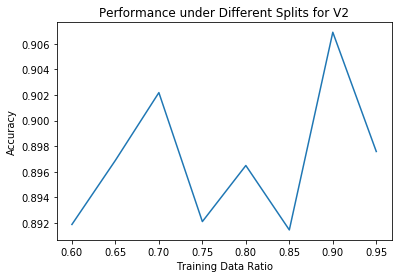

In [6]:
# Plot accuracy against ratio, 
# model: v2
# avarage of N runs

N = 10
ITER = 100
x_data = np.arange(0.6, 1.0, 0.05)
y_data = []

for n in range(N):
    y_ = []
    for ratio in x_data:
        train_data, test_data = split(dataset, ratio)
        a = []
        for digit in range(10):
            a.append(percepton_accuracy2(train_data, test_data, ITER, digit))
        y_.append(np.mean(a))

    y_data.append(y_)
    
y_data = np.mean(y_data, axis=0)

plt.plot(x_data, y_data)
plt.xlabel('Training Data Ratio')
plt.ylabel('Average Accuracy across Digits')
plt.title('Average Performance under Different Splits for V2')
plt.savefig('splits_v2_smoothed.png')